___

## (blank)
#### DJ Dawkins, Nathan Deinlein, Joseph Lazarus, and Puri Rudick​

DS7333 QTW: Case Study 7
___

```
Predicted Class 1, but it is not: Lose $100
Predicted Class 0, but it is not: Lose $25
```

This Notebook will cover the following topics in order: 
1. Business Overview and Objectives
2. Data Evaluation and Engineering
3. Modeling Preparations
4. Model Building and Model Evaluation
5. Model Interpretability and Explainability
6. Conclusions and Discussions

In [3]:
# Imports necessary python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
### Business Overview and Objectives
(blank)

---
### Data Evaluation and Engineering

#### **Data Description:**
- There is a total of 160k observations in the dataset.
- (mising values)
- The dataset contains 51 features (named x0 to x49, and y).  All features are numerical variables, except for country and month.
    - 47 of the features are continous variables.
    - 3 of the features; country is a categorical variable, then month and day are dates.
    - Target feature are binary, with values of 1 or 0
- The target variable is binary, called 'y' with 2 values: '0' for Non-Detection and '1' for Detection. The classes are split 60/40 balanced with the positve target value having a prevlaence of ~40%.
    - *95,803* observations for '0' or Non-Detection class
    - *64,197* observations for '1' or Detection class


In [4]:
# Read in data
# Save the file locally and read in using the file's path

# path = "./final_project(5).csv"
path = '/Users/puri/DataScience@SMU/10.DS7333 QTW/final_project(5).csv'

df = pd.read_csv(path)

In [5]:
df.shape

(160000, 51)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [7]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

In [8]:
# settings to display all columns
pd.set_option("display.max_columns", None)

df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [9]:
# "x24" country, "x29"month, "x30"day, "x32"rate, "x37"$ ammount

df["x37"] = df["x37"].str.replace("$","").astype(float)
df["x32"] = df["x32"].str.replace("%","").astype(float)

df.head()

/var/folders/vz/68jlc85d78vcqcr5gx1r56l40000gn/T/ipykernel_43338/1504240752.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["x37"] = df["x37"].str.replace("$","").astype(float)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.00,-1.940031,-5.492063,0.627121,-0.873824,1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02,2.211462,-4.460591,1.035461,0.228270,1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01,0.419607,-3.804056,-0.763357,-1.612561,430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01,-3.442715,4.420160,1.164532,3.033455,-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01,-0.431640,12.165494,-0.167726,-0.341604,-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [10]:
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True))

0    95803
1    64197
Name: y, dtype: int64
0    0.598769
1    0.401231
Name: y, dtype: float64


#### **Exploratory Data Analysis (EDA):**

**Missing Values and Duplicated Rows**<br>
(blank)

**Statistical Summary Table** of the dataset as shown below.


In [11]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,159957.000000,159970.000000,159964.000000,159969.000000,159966.000000,159965.000000,159974.000000,159973.000000,159960.000000,159965.000000,159962.000000,159971.000000,159973.000000,159953.000000,159978.000000,159964.000000,159970.000000,159965.000000,159961.000000,159969.000000,159959.000000,159959.000000,159970.000000,159973.000000,159977.000000,159969.000000,159977.000000,159964.000000,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,0.002253,0.030232,-1.334402,0.007669,0.008104,0.001215,0.006223,0.012040,0.012694,0.024555,0.299074,-0.029137,0.008400,0.722028,-0.000806,-0.001066,-0.004159,0.031543,-0.005945,-0.000011,-0.006567,-0.000426,0.000936,0.006453,0.377628,6.059130,0.004253,-2.316526,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,7.871429,8.769633,14.750990,8.953837,6.964097,3.271779,4.984065,7.569351,4.540714,7.595316,5.806203,9.409635,5.412010,14.909127,1.263656,0.843258,6.774047,14.439534,2.767508,0.010400,1.747762,8.014180,2.379558,1.593183,999.945334,16.891603,5.134322,17.043549,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,-6.364653,-3.857484,-32.003555,-72.896705,-12.289364,-0.050000,-7.451454,-36.116606,-10.008149,-6.866024,-4734.540000,-74.297559,-22.101647,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,-5.288196,-5.903274,-11.379492,-6.029945,-4.696755,-2.207774,-3.344027,-5.071470,-3.056131,-5.101553,-3.607789,-6.361115,-3.649766,-9.268532,-0.852784,-0.567293,-4.597919,-9.702464,-1.874206,-0.010000,-1.183681,-5.401084,-1.610337,-1.068337,-691.370000,-5.249882,-3.458716,-13.953629,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,-0.018176,0.010941,-1.624439,-0.003473,0.002467,0.003535,0.012754,0.024541,0.015904,0.044703,0.433055,-0.026385,0.011144,1.029609,-0.003723,-0.001501,0.037138,0.244210,0.002013,0.000000,-0.006079,-0.013089,-0.002399,0.003645,-13.760000,6.184410,0.019068,-2.701867,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,5.331573,5.935032,8.374524,6.041959,4.701299,2.211660,3.366853,5.101962,3.073002,5.164732,4.306566,6.316457,3.672678,11.028035,0.851765,0.567406,4.649773,9.936995,1.856369,0.010000,1.179460,5.411667,1.603089,1.079895,664.210000,17.420148,3.463308,8.981616,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,37.945583,36.360443,73.279354,42.392177,32.546340,13.782559,21.961123,37.057048,19.652986,33.515550,27.814560,46.237503,24.863012,58.490500,5.314169,3.951652,28.645074,67.753845,12.279356,0.050000,7.787120

In [12]:
# Count missing values
df_na = pd.DataFrame(df.isna().sum())
df_na.rename(columns={df_na.columns[0]: 'count'}, inplace = True)

df_na = df_na[df_na['count'] != 0]
df_na['percent_missing'] = df_na['count']/df.shape[0]
df_na = df_na.sort_values('count', ascending=False)

df_na.shape

(50, 2)

<AxesSubplot:xlabel='count', ylabel='index'>

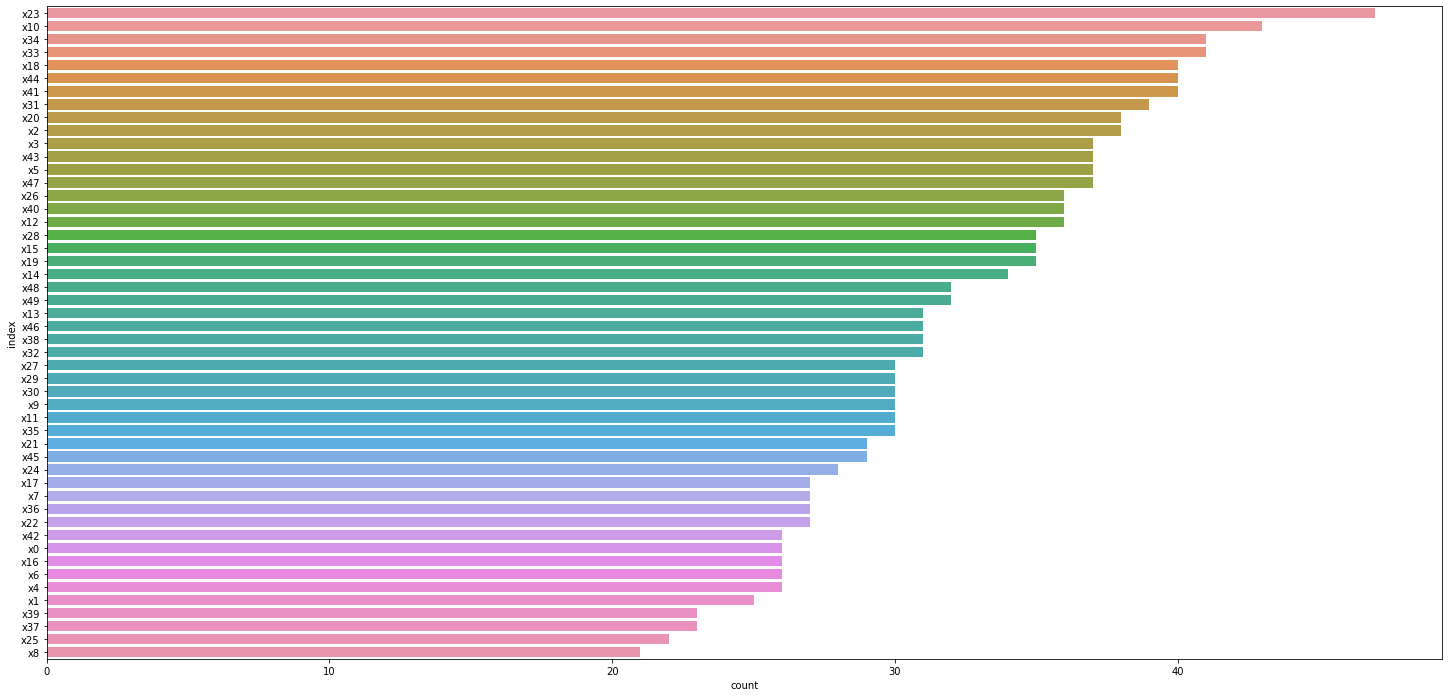

In [13]:
a4_dims = (25, 12)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)
sns.barplot(x="count", y="index", data=df_na.reset_index())

In [14]:
# Check for duplicate rows
print('Duplicate rows: ', df.duplicated(keep='first').sum())

Duplicate rows:  0


**Data Distribution and Correlation**<br>

Data Observations from histograms and correlation heatmap:
- All 22 continous variables (everything except f5, f9, f13, f17, f21, and mass) take on either a normal-ish distribution or a uniform distribution
- For features f0, f3, f6, f10, f14, f18, and f26 the pos. and neg. classes appear to take on noticiably different shapes.<br>
- Feature f24 values for both pos and neg are predominantly 0.<br>
- However, when plot these features on box plots (below), we do not see any major shift between classes in the data.
- The correlation heatmap below clearly displays that there is no evidence of correlation was found among any of the features.<br>

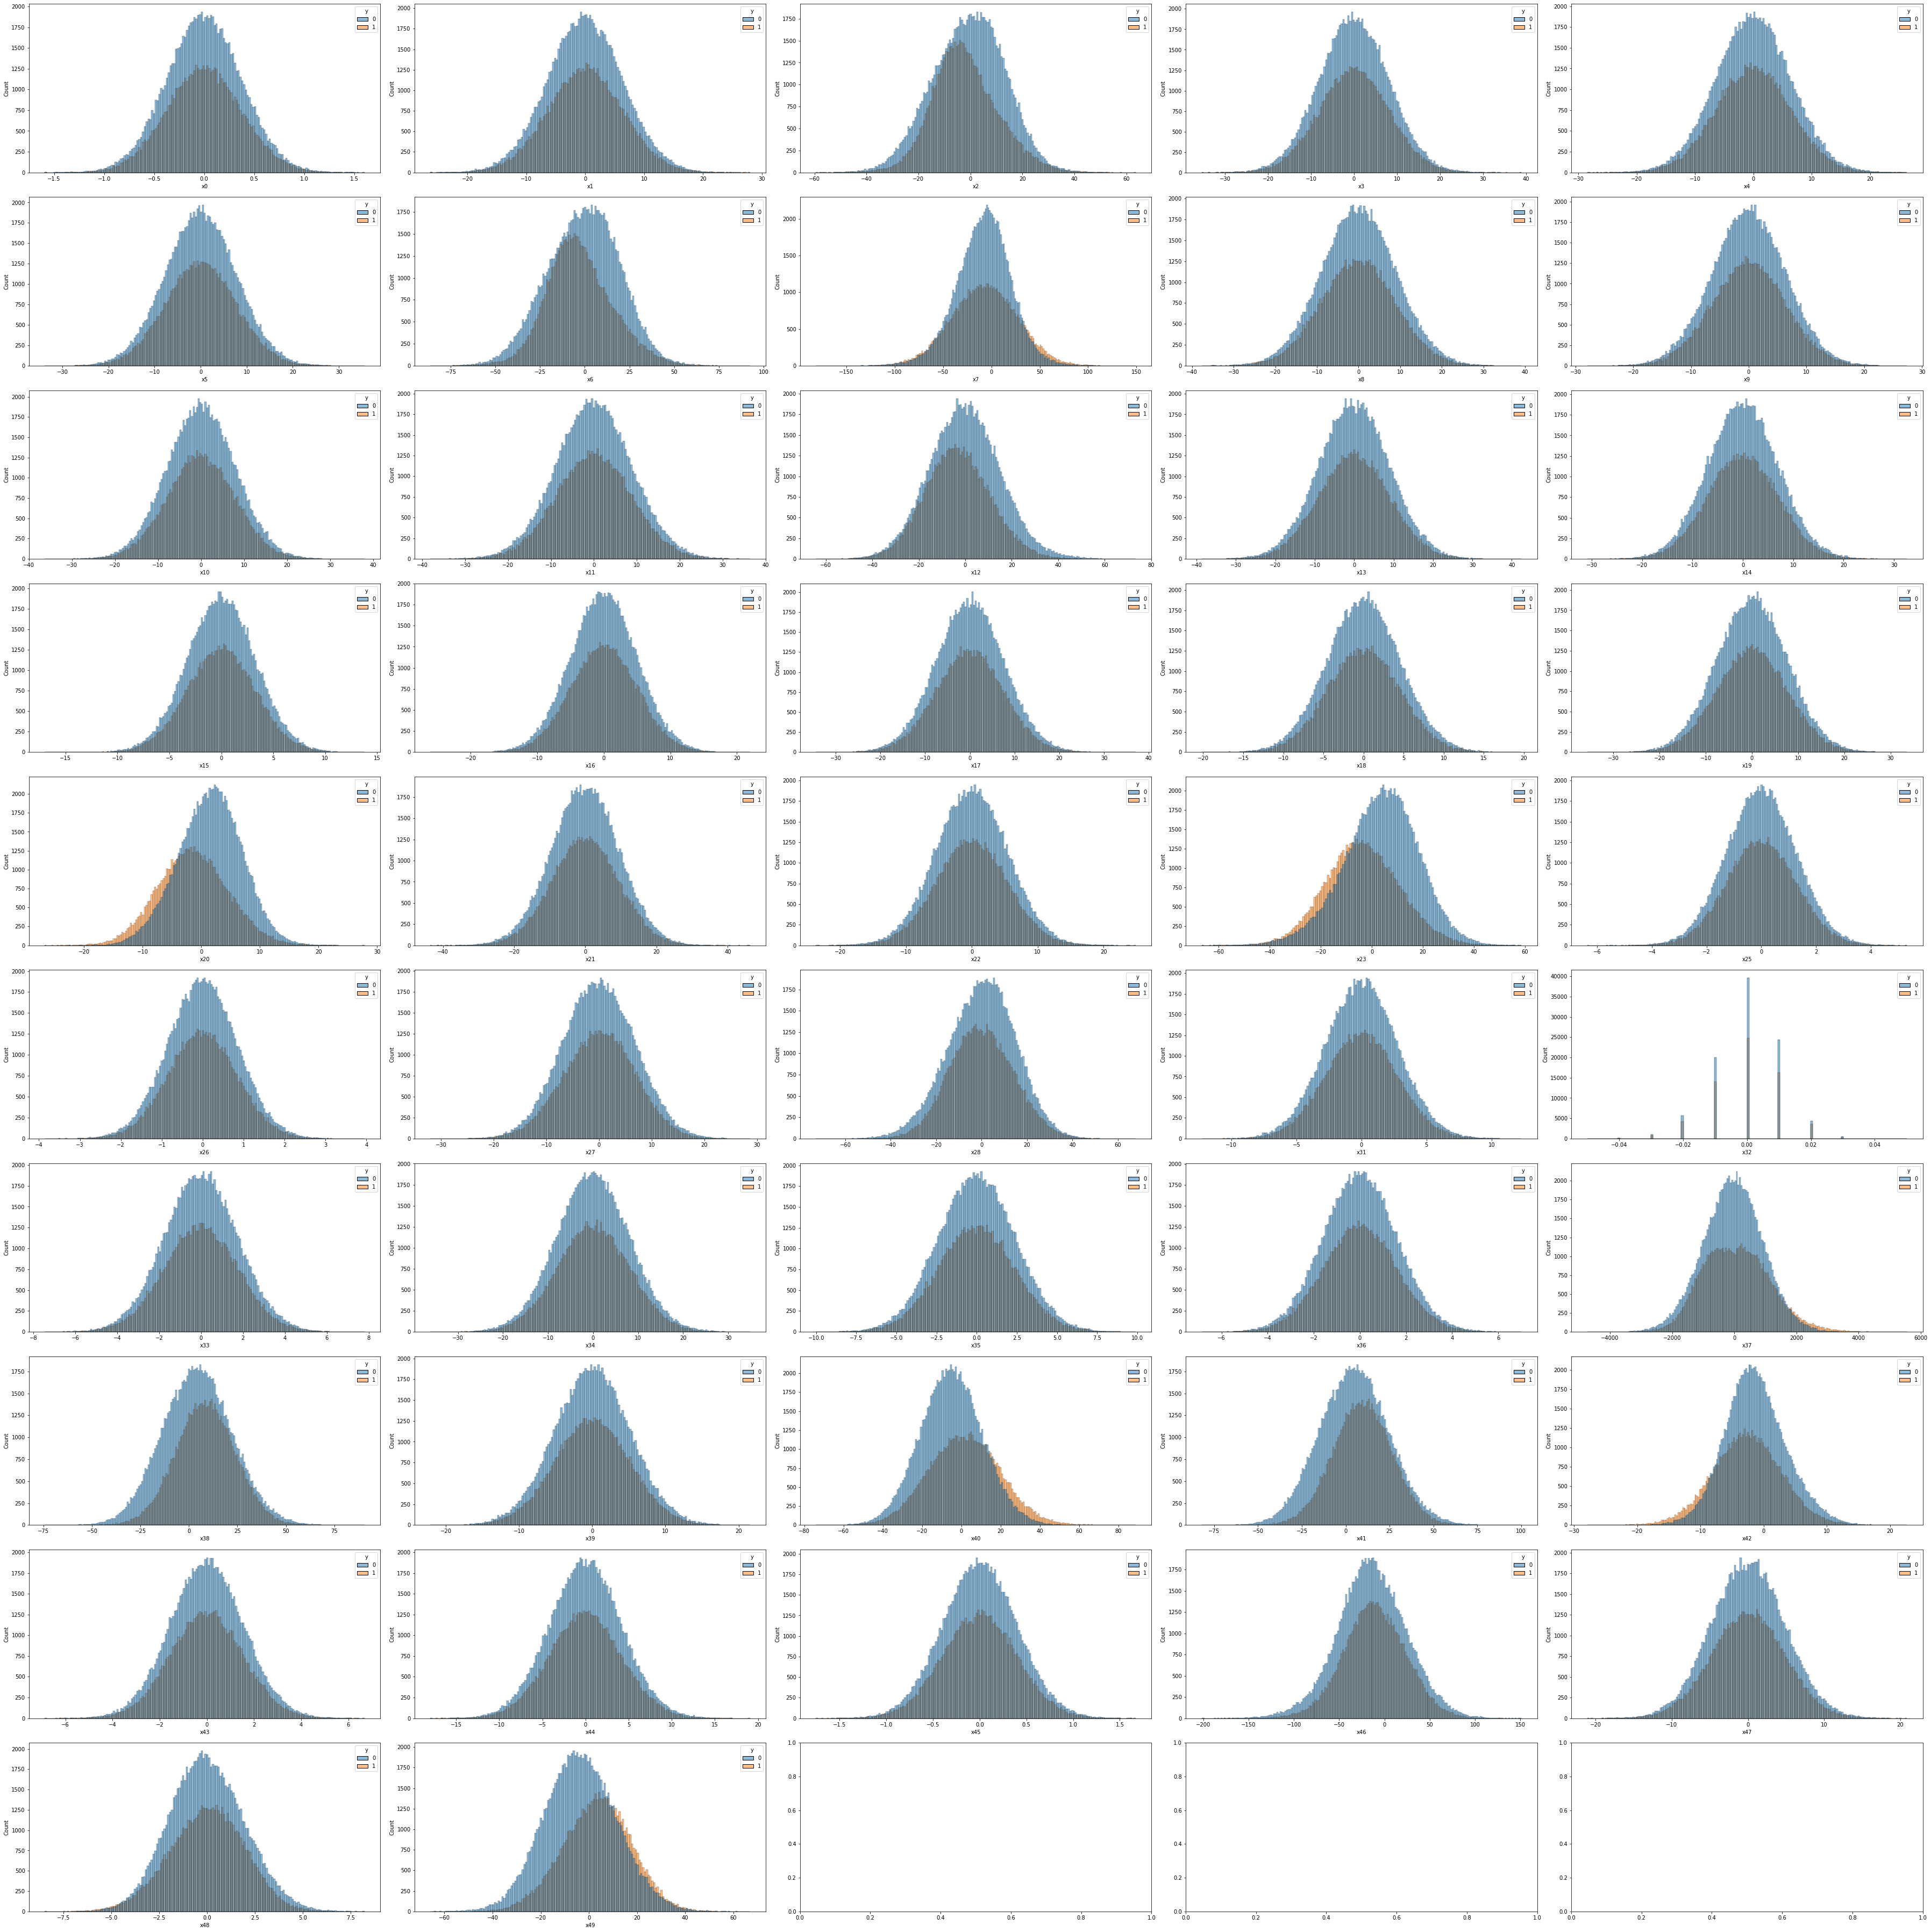

In [15]:
df_features = df.copy()
df_features.drop(["y"], axis=1, inplace=True)

df_features_col_list = list(df_features.columns)
cat_ft_list = ["x24", "x29", "x30"]
continuous_ft_list = [e for e in df_features_col_list if e not in cat_ft_list]

fig,axs = plt.subplots(10,5, figsize = (50,50))
h, v = 0, 0
for i in continuous_ft_list:
    sns.histplot(data=df, x=i, hue='y', multiple='layer', ax=axs[h, v])
    if v == 4:
        h += 1
        v = 0
    else:
        v += 1
        
fig.tight_layout()

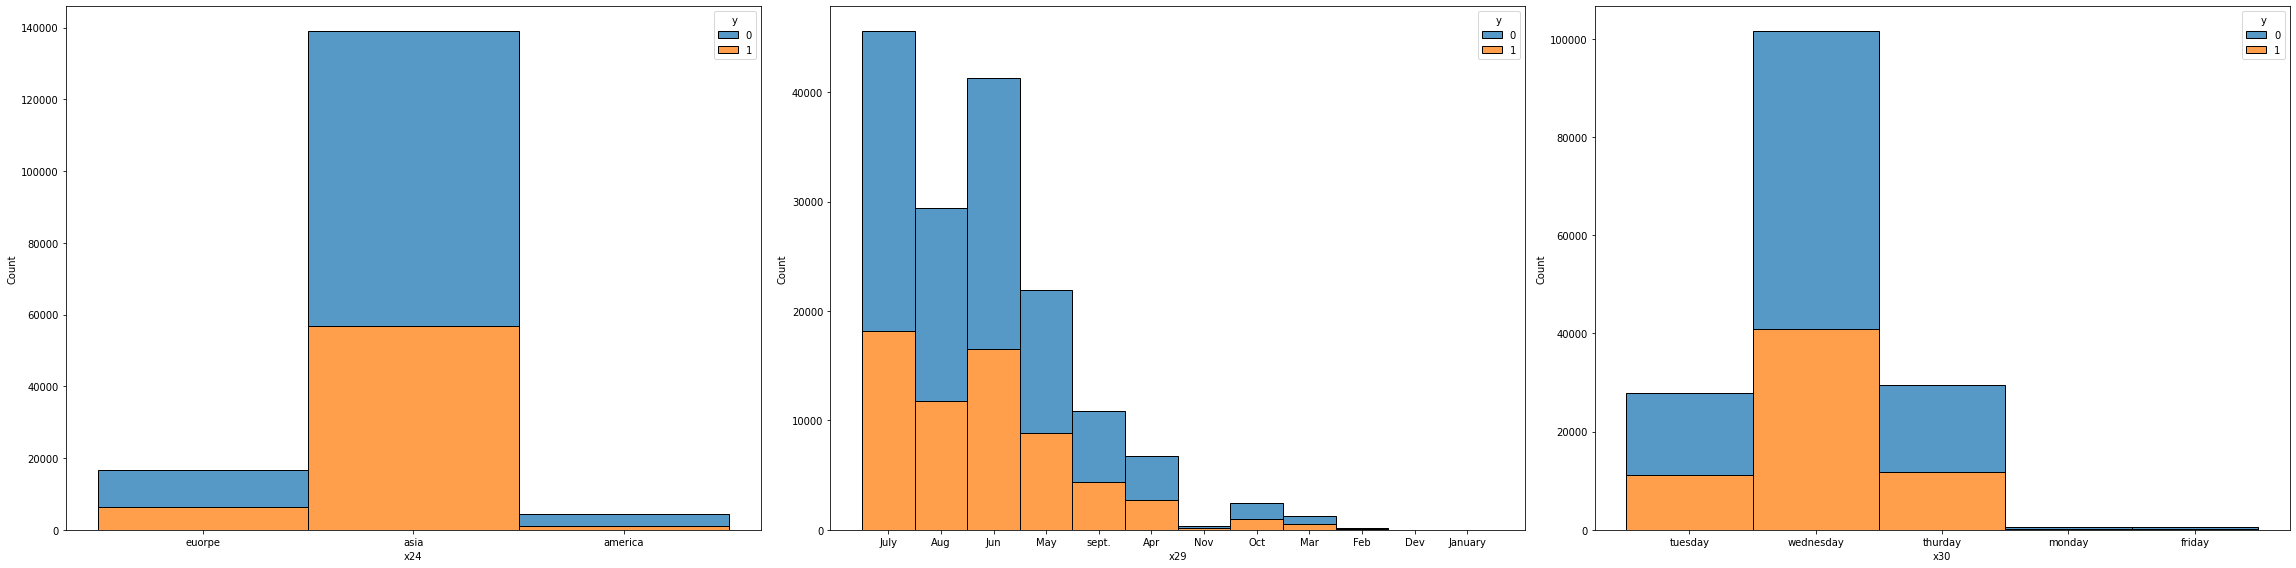

In [16]:
fig,axs = plt.subplots(1,3, figsize = (32,8))
h, v = 0, 0
for i in cat_ft_list:
    sns.histplot(data=df, x=i, hue='y', multiple='stack', ax=axs[v])
    v += 1
        
fig.tight_layout()

In [17]:
df[[i for i in df.columns if i not in ['x37','y']]]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.00,-1.940031,-5.492063,0.627121,-0.873824,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02,2.211462,-4.460591,1.035461,0.228270,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01,0.419607,-3.804056,-0.763357,-1.612561,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01,-3.442715,4.420160,1.164532,3.033455,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01,-0.431640,12.165494,-0.167726,-0.341604,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,-0.767600,-12.559985,-17.261030,1.539396,-9.381709,1.902309,3.312219,-5.294374,-2.282197,-0.086858,-1.561650,-6.587422,5.722581,6.204019,asia,0.157849,0.480470,0.365907,28.161584,Aug,wednesday,2.592255,0.00,2.308255,-6.255585,-0.316119,-2.356991,-8.491069,2.475853,-5.032652,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,-6.476405,-8.620521,-23.885703,3.337138,-8.122024,4.028587,-0.034659,6.270644,7.208875,0.328383,1.659820,-16.104552,-4.897545,11.803698,asia,-1.233164,-0.719404,-2.365497,-17.981797,May,wednesday,6.987802,-0.01,1.221009,-7.472690,0.919167,-1.730434,11.576948,-7.420619,-8.472736,12.803189,0.841446,-0.682177,-5.047677,-0.017898,0.780130,6.387266,-1.374742,-1.623952
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,-0.132832,-4.303314,-7.488812,-1.683871,1.601512,-0.208325,3.796216,4.063787,1.326340,-2.845733,-9.689120,-11.673887,0.514821,-8.632121,asia,-0.950303,-0.365088,-6.225611,10.830742,Jun,wednesday,0.809179,-0.00,0.092094,5.329182,-0.693540,0.163876

<AxesSubplot:>

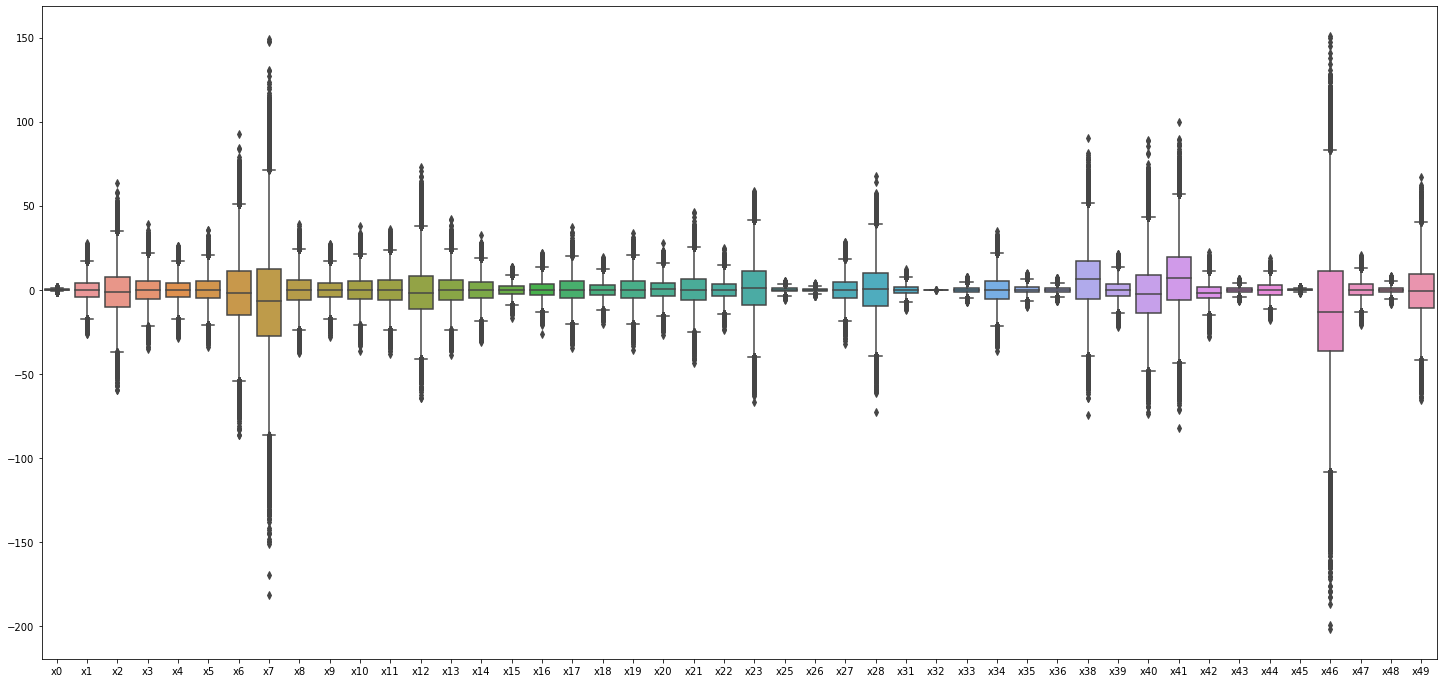

In [18]:
fig, axes = plt.subplots(figsize=a4_dims)

sns.boxplot(data = df[[i for i in df.columns if i not in ['x37','y']]])

<AxesSubplot:>

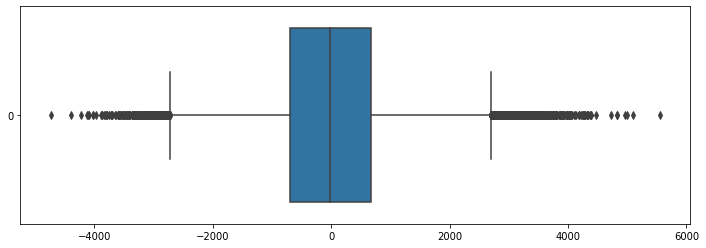

In [19]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(data = df['x37'], orient='h')

<AxesSubplot:>

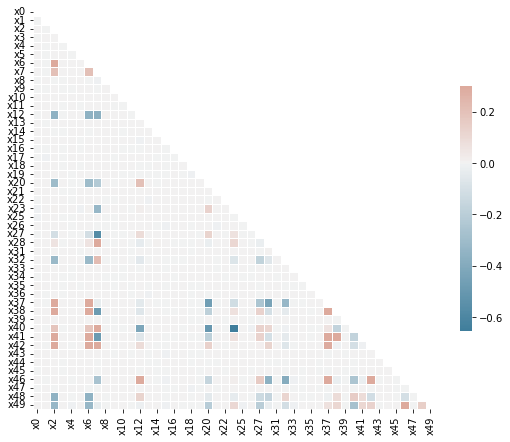

In [20]:
# Get correlation
corr = df[continuous_ft_list].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Split train and test dataset

In [21]:
from sklearn.model_selection import train_test_split

# Random Forest - Using Full_df
model_data = df.copy()

feature_data = model_data.copy()
feature_data.drop(['y'], axis=1, inplace=True)

target_data = model_data['y']

# Splitted train and test dataset
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.10, random_state=0)

print("Size of modeling set (to be CV split): ", X_train.shape)
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print("Size of hold back validation set: ", X_test.shape)
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

Size of modeling set (to be CV split):  (144000, 50)
0    86239
1    57761
Name: y, dtype: int64
0    0.598882
1    0.401118
Name: y, dtype: float64
Size of hold back validation set:  (16000, 50)
0    9564
1    6436
Name: y, dtype: int64
0    0.59775
1    0.40225
Name: y, dtype: float64


In [22]:
mode_replace_cols = cat_ft_list + ['x32']
median_replace_cols = ['x7', 'x37', 'x46']
mean_replace_cols = [e for e in continuous_ft_list if e not in (median_replace_cols + mode_replace_cols)]

# Replace missing values in catergorical and catergorical numerical variables with its mode.
for col in mode_replace_cols:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_test[col].mode()[0], inplace=True)

# Replace missing values in numerical variables with its mean.
for col in mean_replace_cols:
    X_train[col].fillna(X_train[col].mean(), inplace=True)
    X_test[col].fillna(X_test[col].mean(), inplace=True)

# Replace missing values in numerical variables with its median.
for col in median_replace_cols:
    X_train[col].fillna(X_train[col].median(), inplace=True)
    X_test[col].fillna(X_test[col].median(), inplace=True)

In [23]:
from sklearn.preprocessing import OneHotEncoder

# using pd get dummies for the category columns we are keeping
dummies_train = pd.get_dummies(X_train[cat_ft_list],drop_first=True)
#dropping original columns
X_train = X_train.drop(cat_ft_list,axis=1)
#concating dummies to the data frame
X_train = pd.concat([X_train,dummies_train],axis=1)
print('X_train shape:', X_train.shape)


dummies_test = pd.get_dummies(X_test[cat_ft_list],drop_first=True)
X_test = X_test.drop(cat_ft_list,axis=1)
X_test = pd.concat([X_test,dummies_test],axis=1)
print('X_test shape:', X_test.shape)

X_train shape: (144000, 64)
X_test shape: (16000, 64)


In [24]:
#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_ = scl_obj.transform(X_train)

scl_obj.fit(X_test)
X_test_ = scl_obj.transform(X_test)

---
### Classification Models
<img src="https://miro.medium.com/max/1400/1*6n0rqLRc8ljOsNlQ2Z5xug.png" style="float: right" width="700"/>

To approach the objectives of this case study, we decided to use **Decision Tree Algorithm**. There are multiple advantages of the algorithm that we aould like to mention here:
- It can be used to solve both regression and classification problems.
- It requires less effort for data preparation during pre-processing. It does not require normalization of data as well.
- It is very intuitive and easy to explain to technical teams as well as stakeholders.
- Missing values in the data also do NOT affect the process of building a decision tree in some types of models.



There are 2 decision tree models that we are proposing for this classification:

#### **Random Forest**
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each *individual tree* to try to create an *uncorrelated forest* of trees whose prediction by committee is more accurate than that of any individual tree.

In conclusion, Random forest is a collection of trees in which each of them gives a prediction and finally, we collect the outputs from all the trees and considers the mean, median, or mode of this collection as the prediction of this forest depending upon the nature of data (either continues or categorical).

#### **XGBoost** (eXtreme Gradient Boosting)
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost was developed to increase speed and performance, while introducing regularization parameters to reduce overfitting. Gradient boosted trees use regression trees (or CART) in a sequential learning process as weak learners.


###### *<div style="text-align: right">Image Credits: https://dataaspirant.com</div>*

### Model Preparations

1. We used train_test_split function from sklearn to split the dataset into **90% of the dataset to the train and 10% to the test dataset**. To make sure that we have the validate dataset that is not invaded by model building process.
2. **StandardScaler** function from sklearn is used to scale all features.


#### Scale All Features Using ColumnTransformer and StandardScaler. Created Pipeline for a Model.
We also setup model parameters for RandomSearchCV in this section.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,  OneHotEncoder

In [26]:
from sklearn.metrics import confusion_matrix

false_positive = 100
false_negative = 25

def lost_per_obs(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    w = np.array([[0, false_positive], [false_negative, 0]])
    total_lost = cm * w
    return total_lost.sum()/cm.sum() #Returns Cost/Observation, not total cost 

In [29]:
# Create scorer for those 4 matrices mentioned above.
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'F1': make_scorer(f1_score, average='macro'), 
    'money_lost': make_scorer(lost_per_obs, greater_is_better=False)
}

In [27]:
test_matrices = pd.DataFrame(columns=['model', 'acc', 'precision', 'recall', 'f1', 'money_lost_per_obs'])

---
# Logistic Regression

In [28]:
lr = LogisticRegression()

# Setup model parameters for RandomSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'C': [1, 10, 20],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
}

import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lr_ = RandomizedSearchCV(lr, param_grid, scoring=make_scorer(lost_per_obs, greater_is_better=False), n_jobs=-1, verbose=0, random_state=42)
    lr_.fit(X_train_, y_train)
lr_.best_params_

/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'solver': 'saga', 'penalty': 'l1', 'class_weight': None, 'C': 1}

In [30]:
lr_model = LogisticRegression(
    penalty = 'l1', 
    C = 1,
    solver = 'saga',
    class_weight = None
)

model_lr = cross_validate(lr_model, X_train_, y_train, cv=5, scoring=scorer, error_score="raise")

print("Mean Accuracy = ",model_lr['test_accuracy'].mean())
print("Mean Precision = ",model_lr['test_precision'].mean())
print("Mean Recall = ",model_lr['test_recall'].mean())
print("Mean F1 = ",model_lr['test_F1'].mean())
print("Mean Money Lost per Observation = ",model_lr['test_money_lost'].mean())

/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Mean Accuracy =  0.7023333333333334
Mean Precision =  0.6924131972007008
Mean Recall =  0.6717715034203713
Mean F1 =  0.6755312880423567
Mean Money Lost per Observation =  -15.243229166666666


/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
lr_model.fit(X_train_, y_train)

y_true, y_pred = y_test, lr_model.predict(X_test_)
report = classification_report(y_true, y_pred, output_dict=True)

l = ['Random Forest', report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = l
test_matrices

/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,model,acc,precision,recall,f1,money_lost_per_obs
0,Random Forest,0.705875,0.696982,0.675816,0.679699,14.99375


---
# RF

In [32]:
rf = RandomForestClassifier()

# Setup model parameters for RandomSearchCV
param_grid = {
    "n_estimators": [50],#, 100, 300, 500],
    "max_features": ["auto"],#, "sqrt", "log2"],
    "max_depth": [10],#, 20, 30, 40, 50],
    "criterion": ["gini"]#, "entropy"],
}

rf_ = RandomizedSearchCV(rf, param_grid, scoring=make_scorer(lost_per_obs, greater_is_better=False), n_jobs=-1, verbose=0, random_state=42)
rf_.fit(X_train_, y_train)
rf_.best_params_

/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 50,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini'}

#### 3. Use RandomizedSearchCV to Find Best Model Parameters
*Here you can see that we used recall score for the RandomizedSearchCV. We will discuss about this in the next section.*

The best Random Forest model parameters based on RandomizedSearchCV shown below. In general, all models from RandomizedSearchCV delivered quite low recall score, about 0.06 - 0.24.

In [33]:
rf_.best_params_

{'n_estimators': 50,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'gini'}

#### 4. Fitted Model Best Parameter to the Train Dataset Using coss_validation (cv=5)

Our Random Forest model has overall accuracy, precision, recall, and F1-score for the train dataset as shown below.

In [35]:
rf_model = RandomForestClassifier(
    n_estimators = 50,
    max_features = 'log2',
    max_depth = 40,
    criterion = 'gini',
)

model_res = cross_validate(rf_model, X_train_, y_train, cv=5, scoring=scorer, error_score="raise")

print("Mean Accuracy = ",model_res['test_accuracy'].mean())
print("Mean Precision = ",model_res['test_precision'].mean())
print("Mean Recall = ",model_res['test_recall'].mean())
print("Mean F1 = ",model_res['test_F1'].mean())
print("Mean Money Lost per Observation = ",model_res['test_money_lost'].mean())

Mean Accuracy =  0.9101319444444445
Mean Precision =  0.9128388300604044
Mean Recall =  0.8996322429558645
Mean F1 =  0.9050646440812831
Mean Money Lost per Observation =  -4.3701388888888895


#### 5. Made Prediction on Test Dataset and Evaluated the Model Performance

When predicting the test dataset with our Random Forest, overall model performance:
- 96% Accuracy
- 86% Precision
- 62% Recall and
- 67% F1-score

The classification report for each class prediction as shown below.

In [36]:
rf_model.fit(X_train_, y_train)

y_true, y_pred = y_test,  rf_model.predict(X_test_)
report = classification_report(y_true, y_pred, output_dict=True)

t = ['Random Forest', report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = t
test_matrices

,model,acc,precision,recall,f1,money_lost_per_obs
0,Random Forest,0.705875,0.696982,0.675816,0.679699,14.993750
1,Random Forest,0.917875,0.921242,0.907802,0.913330,3.876562


---
# XGBoots

In [37]:
from xgboost import XGBClassifier

xg = XGBClassifier(
    nthread = 4,
    seed = 42
)

# Setup model parameters for RandomSearchCV
param_grid = {
    'eta': [0.5],#, 0.8, 1],
    'gamma': [1],#, 1.5, 2],
    'max_depth': [10],#, 20, 30],
    'n_estimators': [100],#, 200, 500],
    'min_child_weight': [5],#, 10, 15],
    'max_leaves': [30],#,50,70],
    'scale_pos_weight': [20]#, 30]
}

xg_ = RandomizedSearchCV(xg, param_grid, scoring=make_scorer(lost_per_obs, greater_is_better=False), n_jobs=-1, verbose=0, random_state=42)
xg_.fit(X_train_, y_train)
xg_.best_params_

/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'scale_pos_weight': 20,
 'n_estimators': 100,
 'min_child_weight': 5,
 'max_leaves': 30,
 'max_depth': 10,
 'gamma': 1,
 'eta': 0.5}

In [38]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    nthread = 4,
    seed = 42,
    eta = .5, 
    gamma = 2,
    max_depth = 10,
    n_estimators = 100, 
    min_child_weight = 10,
    max_leaves = 30, 
    scale_pos_weight = 20
)

model_xgb = cross_validate(xgb_model, X_train_, y_train, cv=5, scoring=scorer, error_score="raise")

print("Mean Accuracy = ",model_xgb['test_accuracy'].mean())
print("Mean Precision = ",model_xgb['test_precision'].mean())
print("Mean Recall = ",model_xgb['test_recall'].mean())
print("Mean F1 = ",model_xgb['test_F1'].mean())
print("Mean Money Lost per Observation = ",model_xgb['test_money_lost'].mean())

Mean Accuracy =  0.9214375
Mean Precision =  0.9155986518104754
Mean Recall =  0.9272198502576693
Mean F1 =  0.9195254696793096
Mean Money Lost per Observation =  -6.546354166666665


In [39]:
rf_model.fit(X_train_, y_train)

y_true, y_pred = y_test,  rf_model.predict(X_test_)
report = classification_report(y_true, y_pred, output_dict=True)

t = ['Random Forest', report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = t
test_matrices

,model,acc,precision,recall,f1,money_lost_per_obs
0,Random Forest,0.705875,0.696982,0.675816,0.679699,14.993750
1,Random Forest,0.917875,0.921242,0.907802,0.913330,3.876562
2,Random Forest,0.915250,0.918423,0.905073,0.910560,4.040625


---
<img src="https://miro.medium.com/max/1400/1*bhFifratH9DjKqMBTeQG5A.gif" style="float: right" width="500"/>

### Classification Model Introduction

To approach the objectives of this case study, we used **Dense Neural Network Model**. There are multiple advantages of the algorithm that we aould like to mention here:
- The dataset of 7 million rows, consisting of prodominetly continuous values, is sufficient to train for a neural networks model.
- We are aware that it is close to impossible to interpret a Neural Network model and since interpability is not a requirement, we strongly believe that using Neural Network model is suitable for this study.
- Neural Network can be expected to self-train quite efficiently in case of problems where the relationships are dynamic or nonlinear.

#### **Neural Network**
Neural Network or Artificial Neural Network (ANN) is computing system inspired by biological neural network that constitute animal brain. Such systems “learn” to perform tasks by considering examples, generally without being programmed with any task-specific rules. A Neural Network made of many units of neurons  (also referred to as a "node") which are grouped into layers.<br>

There are 3 main components of the layers:
- **Input layer** — Initial data for the neural network.
- **Hidden layer(s)** — Intermediate layer between input and output layer and place where all the computation is done.
- **Output layer** — Produce the result for given inputs.
<img src="https://miro.medium.com/max/1400/1*upfpVueoUuKPkyX3PR3KBg.png" style="float: right" width="500"/><br>

**Dense Neural Network:** A dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.


In Neural Network Model, learning process occurs in these steps:
1. Each neuron receives one or more inputs from an external source or from other neurons.
2. Each input is multiplied by a weight to indicate the input's relative importance.
3. The sum of the weighted input(s) is fed into the neuron.
4. Bias is added to the sum of the weighted inputs.
5. An activation function within the neuron performs a calculation on the total.
6. The result is the neuron's output, which is passed to other neurons or delivered to the external world as the machine's output.
7. The output passes through a loss function or cost function that evaluates the accuracy of the neural network's prediction, and results are fed back through the network, indicating adjustments that must be made to the weights and biases.
8. The process is repeated in multiple iterations to optimize the accuracy of the output; weights and biases are adjusted with each iteration.

###### *<div style="text-align: right">Image1 Credits: https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a</div>* *<div style="text-align: right">Image2 Credits: https://towardsdatascience.com/whats-the-role-of-weights-and-bias-in-a-neural-network-4cf7e9888a0f</div>*

#### Scale all features using StandardScaler

#### Import TensorFlow and check for the version

In [40]:
# TensorFlow and tf.keras
import tensorflow as tf
tf.random.set_seed(1234)

print(tf.__version__)

2.9.1


---
### Model Building and Evaluation

#### **Model 1:**  Base Model
We built a base model with only 2 layers

- Six models were built and evaluated, and added more complexity with each proceeding model in efforts to improve the models performance. <br>
Adding more complexity to improve model performance does put your model at risk of overfitting.<br>
Overfitting was addressed during the model building phase by using regularization and dropout layers. <br>
During the evaluation phase overfitting was accounted for by evaluating the models accuracy and loss on the hold out set.<br>

### Metric Functions

In [41]:
import keras.backend as K

# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [42]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.

nn = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu', input_shape=(X_train_.shape[1], )),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')                       
])


nn.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_crossentropy', 'accuracy', Precision, Recall, F1])
    
nn_ = nn.fit(X_train_, y_train, validation_split=0.1, epochs=100, batch_size=10000, verbose=0, callbacks=[callback])

2022-07-30 23:32:20.644742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
nn_eval = nn.evaluate(X_test_, y_test, batch_size=10000)
nn_eval

2/2 [==============================] - 0s 19ms/step - loss: 0.2080 - binary_crossentropy: 0.1995 - accuracy: 0.9429 - Precision: 0.9476 - Recall: 0.9085 - F1: 0.9276


[0.20801709592342377,
 0.19948676228523254,
 0.9429374933242798,
 0.9476134777069092,
 0.908493161201477,
 0.9276366233825684]

In [44]:
y_true, y_pred = y_test, nn.predict(X_test_)
test_pred = [int(p>=0.75) for p in y_pred]

n = ['Neural Network', nn_eval[2], nn_eval[3], nn_eval[4], nn_eval[5], lost_per_obs(y_true, test_pred)]
test_matrices.loc[len(test_matrices)] = n
test_matrices

500/500 [==============================] - 1s 2ms/step


,model,acc,precision,recall,f1,money_lost_per_obs
0,Random Forest,0.705875,0.696982,0.675816,0.679699,14.993750
1,Random Forest,0.917875,0.921242,0.907802,0.913330,3.876562
2,Random Forest,0.915250,0.918423,0.905073,0.910560,4.040625
3,Neural Network,0.942937,0.947613,0.908493,0.927637,2.639063


500/500 [==============================] - 1s 2ms/step


<AxesSubplot:xlabel='y'>

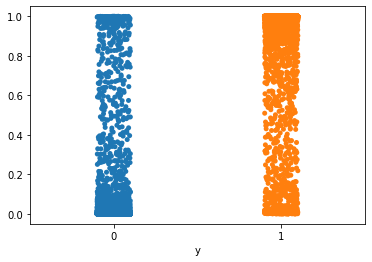

In [45]:
y_true, y_pred = y_test, nn.predict(X_test_)
t_pred = [int(p>=.40) for p in y_pred]

def flatten(t):
    return [item for sublist in t for item in sublist]

NN_predictions2_flattened = flatten(y_pred)

sns.stripplot(x=y_true, y=NN_predictions2_flattened,jitter=True,)

---
# Ensemble

In [93]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [138]:
rf_pred_train = cross_val_predict(rf_model, X_train_, y_train, cv=5, method='predict_proba')
rf_pred_test = cross_val_predict(rf_model, X_test_, y_test, cv=5, method='predict_proba')

In [139]:
nn_pred_train = nn.predict(X_train_)
nn_pred_test = nn.predict(X_test_)

500/500 [==============================] - 1s 1ms/step


In [140]:
ensemble_train = pd.DataFrame()
ensemble_train['rf'] = rf_pred_train[:,1]
ensemble_train['nn'] = nn_pred_train
ensemble_train.head()

,rf,nn
0,0.62,0.925149
1,0.18,0.007828
2,0.84,0.999541
3,0.20,0.000846
4,0.18,0.000101


In [141]:
ensemble_test = pd.DataFrame()
ensemble_test['rf'] = rf_pred_test[:,1]
ensemble_test['nn'] = nn_pred_test
ensemble_test.head()

,rf,nn
0,0.38,0.016543
1,0.26,0.001469
2,0.22,0.000060
3,0.52,0.014586
4,0.34,0.001493


In [142]:
cross_val_score(lr_model, ensemble_train, y_train, cv=5, scoring='accuracy')

array([0.99236111, 0.99111111, 0.99097222, 0.99243056, 0.96666667])

In [145]:
lr_model.fit(ensemble_train, y_train)

y_true, y_pred = y_test, lr_model.predict(ensemble_test)
report = classification_report(y_true, y_pred, output_dict=True)

l2 = ['Ensembel Model', report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = l2
test_matrices

,model,acc,precision,recall,f1,money_lost_per_obs
0,Random Forest,0.916500,0.919964,0.906220,0.911847,3.934375
1,Neural Network I,0.942937,0.947613,0.908493,0.927637,2.959375
2,Random Forest,0.705875,0.696982,0.675816,0.679699,14.993750
3,Ensembel Model,0.943875,0.943801,0.939205,0.941350,3.057812


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.


def compile_and_fit(model, model_name):

    # Compile and fit model
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'F1', lost_per_obs])
    
    model_ = model.fit(X_train_, y_train, validation_split=0.1, epochs=100, batch_size=10000, verbose=0, callbacks=[callback])

    # Evaluate model
    e = model.evaluate(X_test_, y_test, batch_size=10000)

    # Add model name to evaluation object
    e.insert(0, model_name)

    # Convert eval into a df
    test_m = pd.DataFrame([e])
    test_m.columns = ['model','loss','acc']

    return model_.history, test_m

In [ ]:
models_histories = {}
test_matrices = pd.DataFrame()

In [ ]:
# Model 1
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape=(X_train_.shape[1], )),
    tf.keras.layers.Dense(1, activation = 'sigmoid')                      
])

h, t = compile_and_fit(model1, 'Model 1')
models_histories['Model 1'] = h
test_matrices = pd.concat([test_matrices, t])


In [ ]:
# Model 2
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape=(X_train_.shape[1], )),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')                       
])

h, t = compile_and_fit(model2, 'Model 2')
models_histories['Model 2'] = h
test_matrices = pd.concat([test_matrices, t])

In [ ]:
test_matrices

In [ ]:
# Model 3
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape=(X_train_.shape[1], )),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')                       
])

h, t = compile_and_fit(model3, 'Model 3')
models_histories['Model 3'] = h
test_matrices = pd.concat([test_matrices, t])

In [ ]:
test_matrices

In [ ]:
# plot
loss = ['loss', 'val_loss']
acc = ['accuracy', 'val_accuracy']
colors = ['red', 'green', 'blue']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,5))

ax[0].set(title="Model Loss")     
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')
ax[0].set_ylim(0.255, 0.3)
for m, c in zip(models_histories, colors):
    # ax[0].plot(models_histories[m]['val_accuracy'], color=c)
    for l in loss:
        if "val" in l: 
            line='dotted'
        else:
            line='solid'
        ax[0].plot(models_histories[m][l], label=m+' - '+l, linestyle=line, color=c)
ax[0].legend()


ax[1].set(title="Model Accuracy")     
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Accuracy', color='black')
ax[1].set_ylim(0.86, 0.885)
for m, c in zip(models_histories, colors):
    # ax[0].plot(models_histories[m]['val_accuracy'], color=c)
    for a in acc:
        if "val" in a: 
            line='dotted'
        else:
            line='solid'
        ax[1].plot(models_histories[m][a], label=m+' - '+a, linestyle=line, color=c)
ax[1].legend()


ax[2].set(title="Test Dataset Accuracy")     
ax[2].set_xlabel('Model')    
ax[2].set_ylabel('Accuracy', color='black')
ax[2].set_ylim(0.85, 0.89)
ax[2].bar(test_matrices['model'], test_matrices['acc'], color=colors)
        

---
### Case Conclusion

- what are you proposing to your audience and why?
- How should they view your results and what should they consider when moving forward?
- Are there other approaches you'd recommend exploring?